<a href="https://colab.research.google.com/github/durand-kwok/ColabSnowFlake/blob/main/Snowflake_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install snowflake-connector-python



     |████████████████████████████████| 16.5 MB 5.6 MB/s 
     |████████████████████████████████| 3.6 MB 37.0 MB/s 
     |████████████████████████████████| 55 kB 3.6 MB/s 
     |████████████████████████████████| 194 kB 47.0 MB/s 
     |████████████████████████████████| 2.0 MB 39.9 MB/s 
     |████████████████████████████████| 105 kB 50.0 MB/s 


In [3]:
!pip install pyspark


     |████████████████████████████████| 281.4 MB 34 kB/s 
     |████████████████████████████████| 198 kB 51.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=2197e07ab56451f20a8bb18d448e157831f8bde0964134bd8ae756b30f8b6009
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [4]:
import os
from pyspark.sql import SparkSession
from pyspark.sql.types import *

In [5]:
import pandas as pd
import numpy as np
import matplotlib as pet

In [6]:
import snowflake.connector
conn = snowflake.connector.connect(user='DURANDKWOK', password = 'Durand88@', account='mwb44297.us-east-1')

In [7]:
sql = 'select * from TELCO.PUBLIC.telco_churn_curated_temp'
res = conn.cursor().execute(sql).fetchall()

In [8]:
df = pd.read_sql(sql, conn)
df.head(5)

,CUSTID,GENDER,SENIORCITZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,...,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
CUSTID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC,7892-POOKP,6388-TABGU,...,9767-FFLEM,0639-TSIQW,8456-QDAVC,7750-EYXWZ,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,8361-LTMKD,3186-AJIEK
GENDER,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male,...,Male,Female,Male,Female,Female,Male,Female,Female,Male,Male
SENIORCITZEN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
PARTNER,Yes,No,No,No,No,No,No,No,Yes,No,...,No,No,No,No,No,Yes,Yes,Yes,Yes,No
DEPENDENTS,No,No,No,No,No,No,Yes,No,No,Yes,...,No,No,No,No,No,Yes,Yes,Yes,No,No
TENURE,1,34,2,45,2,8,22,10,28,62,...,38,67,19,12,72,24,72,11,4,66
PHONESERVICE,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,...,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes
MULTIPLELINES,No phone service,No,No,No phone service,No,Yes,Yes,No phone service,Yes,No,...,No,Yes,No,No phone service,No,Yes,Yes,No phone service,Yes,No
INTERNETSERVICE,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,DSL,...,Fiber optic,Fiber optic,Fiber optic,DSL,No,DSL,Fiber optic,DSL,Fiber optic,Fiber optic
ONLINESECURITY,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes,...,No,Yes,No,No,No internet service,Yes,No,Yes,No,Yes


In [10]:
df.describe

<bound method NDFrame.describe of           CUSTID  GENDER  SENIORCITZEN PARTNER DEPENDENTS  TENURE  \
0     7590-VHVEG  Female             0     Yes         No       1   
1     5575-GNVDE    Male             0      No         No      34   
2     3668-QPYBK    Male             0      No         No       2   
3     7795-CFOCW    Male             0      No         No      45   
4     9237-HQITU  Female             0      No         No       2   
...          ...     ...           ...     ...        ...     ...   
7038  6840-RESVB    Male             0     Yes        Yes      24   
7039  2234-XADUH  Female             0     Yes        Yes      72   
7040  4801-JZAZL  Female             0     Yes        Yes      11   
7041  8361-LTMKD    Male             1     Yes         No       4   
7042  3186-AJIEK    Male             0      No         No      66   

     PHONESERVICE     MULTIPLELINES INTERNETSERVICE ONLINESECURITY  ...  \
0              No  No phone service             DSL           

In [11]:
!pip3 install seaborn

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


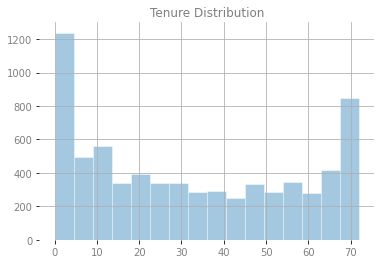

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.grid(b=None)
plt.title("Tenure Distribution",color='grey')
plt.xticks(color='grey')
plt.yticks(color='grey')

sns.set_style("whitegrid")
sns.despine(left=True,bottom=True)

sns.distplot(df['TENURE'], kde=False, axlabel=False);

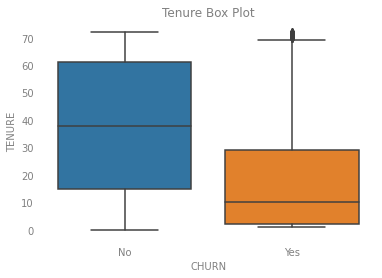

In [13]:
plt.grid(b=None)
plt.title("Tenure Box Plot",color='grey')
plt.xticks(color='grey')
plt.yticks(color='grey')
plt.xlabel("",color='grey')
plt.ylabel("",color='grey')

sns.set_style("whitegrid")
sns.despine(left=True,bottom=True)

sns.boxplot(x="CHURN", y="TENURE", data=df);

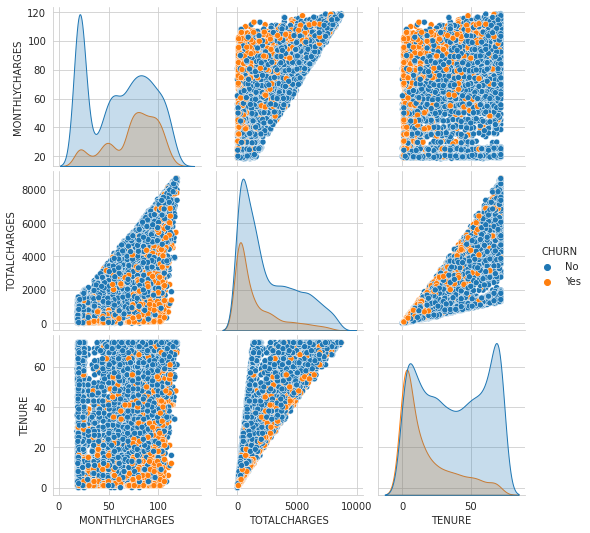

In [14]:
sns.set_style("whitegrid")
example_numeric_data = df[["MONTHLYCHARGES", "TOTALCHARGES","TENURE","CHURN"]]  # pick a few columns
sns.pairplot(example_numeric_data, hue="CHURN");

In [15]:
# connect to Spark
spark = SparkSession\
    .builder\
    .appName("Telco Data Set")\
    .master("local[*]") \
    .getOrCreate()

telco_data_raw=spark.createDataFrame(df) 
telco_data_raw.printSchema()
telco_data_raw.show()

root
 |-- CUSTID: string (nullable = true)
 |-- GENDER: string (nullable = true)
 |-- SENIORCITZEN: long (nullable = true)
 |-- PARTNER: string (nullable = true)
 |-- DEPENDENTS: string (nullable = true)
 |-- TENURE: long (nullable = true)
 |-- PHONESERVICE: string (nullable = true)
 |-- MULTIPLELINES: string (nullable = true)
 |-- INTERNETSERVICE: string (nullable = true)
 |-- ONLINESECURITY: string (nullable = true)
 |-- ONLINEBACKUP: string (nullable = true)
 |-- DEVICEPROTECTION: string (nullable = true)
 |-- TECHSUPPORT: string (nullable = true)
 |-- STREAMINGTV: string (nullable = true)
 |-- STREAMINGMOVIES: string (nullable = true)
 |-- CONTRACT: string (nullable = true)
 |-- PAPERLESSBILLING: string (nullable = true)
 |-- PAYMENTMETHOD: string (nullable = true)
 |-- MONTHLYCHARGES: double (nullable = true)
 |-- TOTALCHARGES: double (nullable = true)
 |-- CHURN: string (nullable = true)

+----------+------+------------+-------+----------+------+------------+----------------+----

In [16]:

telco_data_raw.count()

7043

In [17]:
# count of customers by internet service type 
telco_data_raw.groupby("InternetService")\
              .count()\
              .show()

+---------------+-----+
|InternetService|count|
+---------------+-----+
|    Fiber optic| 3096|
|             No| 1526|
|            DSL| 2421|
+---------------+-----+



In [18]:
telco_data_raw.createOrReplaceTempView("telco")
spark.sql("SELECT Churn, count(*) FROM telco GROUP BY Churn").show()

+-----+--------+
|Churn|count(1)|
+-----+--------+
|   No|    5174|
|  Yes|    1869|
+-----+--------+



In [19]:
telco_data = telco_data_raw.filter(telco_data_raw.CHURN.isNotNull())

In [20]:
total_customers = telco_data.count()
churned_customers = telco_data.filter(telco_data.CHURN == 'Yes').count()
remain_customers = telco_data.filter(telco_data.CHURN == 'No').count()

"Customers total: {}, Churned : {}, Remained : {}".format(total_customers, churned_customers, remain_customers)

'Customers total: 7043, Churned : 1869, Remained : 5174'

In [21]:
spark.sql("SELECT CUSTID, STREAMINGTV, STREAMINGMOVIES, count(*) FROM telco GROUP BY CUSTID, STREAMINGTV, STREAMINGMOVIES").show()

+----------+-------------------+-------------------+--------+
|    CUSTID|        STREAMINGTV|    STREAMINGMOVIES|count(1)|
+----------+-------------------+-------------------+--------+
|4671-VJLCL|                Yes|                 No|       1|
|4612-SSVHJ|                 No|                Yes|       1|
|3580-HYCSP|                Yes|                Yes|       1|
|8224-IVVPA|                 No|                 No|       1|
|0379-DJQHR|                Yes|                Yes|       1|
|1206-EHBDD|                 No|                 No|       1|
|6362-QHAFM|                Yes|                Yes|       1|
|7108-DGVUU|                 No|                Yes|       1|
|7643-RCHXS|No internet service|No internet service|       1|
|5515-RUGKN|                 No|                Yes|       1|
|5453-YBTWV|                Yes|                 No|       1|
|3722-WPXTK|                Yes|                Yes|       1|
|4749-VFKVB|                 No|                 No|       1|
|7765-LW

In [22]:
streaming_df = spark.sql("SELECT *  FROM telco where STREAMINGTV = 'Yes' or STREAMINGMOVIES = 'Yes'")

In [23]:
streaming_df.show()

+----------+------+------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+
|    CUSTID|GENDER|SENIORCITZEN|PARTNER|DEPENDENTS|TENURE|PHONESERVICE|   MULTIPLELINES|INTERNETSERVICE|ONLINESECURITY|ONLINEBACKUP|DEVICEPROTECTION|TECHSUPPORT|STREAMINGTV|STREAMINGMOVIES|      CONTRACT|PAPERLESSBILLING|       PAYMENTMETHOD|MONTHLYCHARGES|TOTALCHARGES|CHURN|
+----------+------+------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+
|9305-CDSKC|Female|           0|     No|        No|     8|         Yes|             Yes|    Fiber optic|            No|          No|             Yes|         No|        

In [24]:
streaming_df_pd = streaming_df.toPandas()

In [25]:
!pip install pyarrow

In [26]:
import snowflake.connector as snow
from snowflake.connector.pandas_tools import write_pandas

conn = snow.connect(user="DURANDKWOK",
   password="Durand88@",
   account="mwb44297.us-east-1")


cur = conn.cursor()

# Starting with the Role.
sql = "USE ROLE ACCOUNTADMIN"
cur.execute(sql)

# And then select it.
#sql = "USE COMPUTE_WH"
#cur.execute(sql)

# And then use it.
sql = "USE DATABASE TELCO"
cur.execute(sql)

# And then use it.
sql = "USE SCHEMA PUBLIC"
cur.execute(sql)

sql = "TRUNCATE TABLE TELCO.PUBLIC.TELCO_STREAMING_CUST"
cur.execute(sql)

# Actually write to the table in snowflake.
write_pandas(conn, streaming_df_pd, 'TELCO_STREAMING_CUST')


(True,
 1,
 3499,
 [('zhtct/file0.txt', 'LOADED', 3499, 3499, 1, 0, None, None, None, None)])

In [27]:


sql = 'select * from TELCO.PUBLIC.TELCO_STREAMING_CUST'
res = conn.cursor().execute(sql).fetchall()

In [28]:
df_2 = pd.read_sql(sql, conn)
df_2.head(5)

,CUSTID,GENDER,SENIORCITZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,...,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
0,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
1,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
2,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
3,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.10,No
4,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
